In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle



In [101]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
#data_semNF = pd.read_csv("nge_dados_input_semNF.csv") # jobs sem nota está emoutro método

In [102]:
data.dtypes

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_pg_word           int64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
dtype: object

In [103]:
data.head(12)

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,87,116142,474,712,60.0,140
1,224325,0,0,1,0,82,122.0,82,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,30,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,42,62913,401,666,21.0,52
4,225531,0,0,2,0,36,48.0,36,37548,239,426,17.0,48
5,228711,2,0,1,0,77,108.0,77,101967,286,487,17.0,88
6,226842,0,0,1,0,46,66.0,46,96474,99,114,37.0,66
7,228307,0,0,1,0,62,95.0,62,43155,40,73,25.0,70
8,228354,0,0,1,0,76,110.0,76,129122,14,10,26.0,96
9,228437,0,0,2,0,18,18.0,80,145038,175,370,35.0,18


In [104]:
data['qtd_pg_word'].unique()

array([ 87,  82,  30,  42,  36,  77,  46,  62,  76,  80,  13,  34,  52,
        18,  78,  50,  47,  54,  88,  91,  38, 214,  22,  26,  92,  14,
        40,  81,  63, 216,  24,  33, 195,  29,  60, 107,  85,  68,  41,
       112,  45,  19,  51,  31,  56,  72,  28,  21,  12,  17, 131,  67,
       207,  43,  86,  90,  49,  39,  59,  48,  57,  73,  23,  37])

In [105]:
data['qtd_pag_word'].unique()

array([ 87,  82,  41,  36,  77,  46,  62,  76,  18,  33,  34,  57,  22,
        78,  50,  38,  54,  88,  91,  80, 214,  26,  83,  40,  81,  63,
       216,  51,  27, 195,  29,  58,  92, 107,  85,  67,  24, 112,  45,
        19,  31,  56,  72,  28,  12, 158,  66, 207,  43,  17,  86,  90,
        49,  59,  48, 100,  39,  42,  32,  73,  23])

In [106]:
data[data['qtd_pag_word']!=data['qtd_pg_word']][['id','qtd_pag_word','qtd_pg_word']]

,id,qtd_pag_word,qtd_pg_word
2,225392,41,30
3,225392,41,42
9,228437,18,80
10,228603,33,13
12,228837,57,52
13,229294,22,18
17,229536,38,47
27,231210,83,92
28,230571,80,14
34,231890,51,52


In [107]:
data[data['qtd_pg_word']<10][['id','qtd_pag_word','qtd_pg_word']]

,id,qtd_pag_word,qtd_pg_word


In [108]:
data['id'].count()

104

In [109]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [110]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
count,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,230346.855769,0.250000,0.057692,1.451923,0.0,56.557692,91.221154,55.134615,84253.932692,264.346154,352.634615,26.903846,75.711538
std,22982.498109,0.570301,0.234290,0.636736,0.0,39.821648,62.179502,39.471769,86245.882065,159.298387,216.780774,13.062597,53.872498
min,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,18.000000,12.000000,12032.000000,2.000000,2.000000,3.000000,18.000000
25%,230899.500000,0.000000,0.000000,1.000000,0.0,31.750000,48.000000,29.000000,31189.000000,121.750000,171.500000,19.000000,44.000000
50%,233439.500000,0.000000,0.000000,1.000000,0.0,45.500000,75.000000,45.500000,63562.000000,285.000000,342.500000,23.000000,68.000000
75%,235307.000000,0.000000,0.000000,2.000000,0.0,73.750000,110.000000,72.250000,104180.250000,394.500000,459.750000,30.000000,88.000000
max,235831.000000,2.000000,1.000000,3.000000,0.0,216.000000,420.000000,216.000000,571640.000000,550.000000,823.000000,71.000000,340.000000


# Normalizar?

In [111]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [112]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [113]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

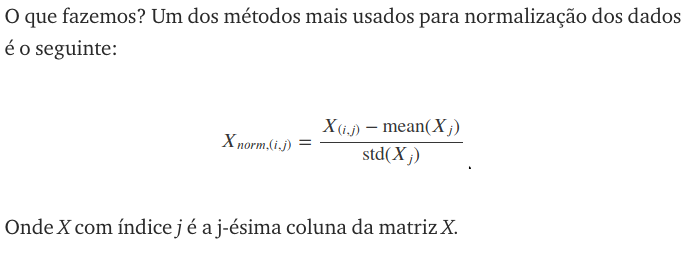

In [114]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [115]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [116]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [117]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [118]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [119]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [120]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_pg_word', 'qtd_carc',
       'qtd_tabela', 'qtd_image', 'qtd_estilos', 'pag_final',
       'qtd_carc_normal'],
      dtype='object')

In [121]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc']



colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [122]:
# método train_test_split, Scikit-Learn 
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.10, random_state=42)

In [123]:
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((93, 6), (11, 6), (93, 1), (11, 1))

In [124]:
y_test_f.head()

,pag_final
30,100
65,176
64,24
53,34
45,104


In [125]:
X_train_f

,complexidade,entidade,qtd_pag_word,qtd_tabela,qtd_image,qtd_carc
31,1,0,63,528,816,97543
88,2,0,28,111,193,24182
95,2,0,23,56,100,16992
77,1,0,86,87,170,101971
4,2,0,36,239,426,37548
...,...,...,...,...,...,...
71,1,0,207,399,381,571640
14,2,0,18,155,263,16595
92,2,0,32,2,2,29683
51,1,0,112,498,758,223019


In [126]:
X_train_f.dtypes

complexidade    int64
entidade        int64
qtd_pag_word    int64
qtd_tabela      int64
qtd_image       int64
qtd_carc        int64
dtype: object

In [127]:
y_train_f

,pag_final
31,76
88,38
95,30
77,82
4,48
...,...
71,296
14,28
92,44
51,126


In [128]:
print(X_train_f.shape,y_train_f.shape)

(93, 6) (93, 1)


In [129]:
print(X_train_f.shape,y_train_f.values.ravel().shape)

(93, 6) (93,)


In [130]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

#modelo.fit(X_train_f, y_train_f)
modelo = modelo.fit(X_train_f, y_train_f.values.ravel())

# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to   (n, )

In [131]:
p = modelo.predict(X_test_f)

In [132]:
p

array([98, 84, 22, 40, 76, 92, 52, 86, 48, 96, 70])

In [133]:
print(p.shape,y_test_f.shape)

(11,) (11, 1)


In [134]:
y_test_f

,pag_final
30,100
65,176
64,24
53,34
45,104
93,62
91,54
47,92
10,40
0,140


In [135]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_f,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo
# RMSE:  28.926238482168273   ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']


RMSE:  33.368466333569266


In [136]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-forest3a.sav'
pickle.dump(linreg, open(filename, 'wb'))
 

In [137]:
##############################################################################################################

In [138]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [139]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [140]:
##############################################################################################################

In [141]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [173]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['id','qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['id','complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [174]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1) # feito com 0,10 e agora com 0,20

In [175]:
####
####   selecionar a FEATURES para MODELO
####
# mantendo algumas features para compara resultados no final no arquivo X_train_ref
X_test_ref = X_test.copy()
X_train_ref= X_train.copy()

# X_test = X_test_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]
X_test = X_test_ref[[ 'qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]

#X_train = X_train_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]
X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]




In [176]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_carc',
       'qtd_tabela', 'qtd_image', 'qtd_estilos', 'qtd_carc_normal'],
      dtype='object')

In [177]:
X_train

,qtd_pag_word,qtd_tabela,qtd_image,qtd_carc_normal
46,85,550,823,0.217956
91,42,467,444,0.050348
58,72,326,322,0.151851
33,63,149,172,0.112130
88,28,111,193,0.021712
...,...,...,...,...
75,78,489,540,0.190476
9,18,175,370,0.237677
72,46,217,288,0.136671
12,57,160,358,0.105027


In [178]:
y_train

,pag_final
46,96
91,54
58,86
33,74
88,38
...,...
75,108
9,18
72,76
12,68


In [179]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print('coeficientes encontrados: ',linreg.coef_) # para visualizar os coeficientes encontrados



[14.03638647]
coeficientes encontrados:  [[ 8.58321562e-01  1.39364765e-02 -1.69996322e-02  1.21158571e+02]]


In [180]:
# para visualizar os coeficientes encontrados
# para visualizar o R²
# linreg.score()

In [181]:
colunas_X

['id',
 'complexidade',
 'qtd_pag_estimado',
 'qtd_pag_word',
 'qtd_carc',
 'qtd_tabela',
 'qtd_image',
 'qtd_estilos',
 'qtd_carc_normal']

In [182]:
X_train.columns

Index(['qtd_pag_word', 'qtd_tabela', 'qtd_image', 'qtd_carc_normal'], dtype='object')

In [183]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('id',
  array([ 8.58321562e-01,  1.39364765e-02, -1.69996322e-02,  1.21158571e+02]))]

In [184]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [185]:
y_pred

array([[45.83678322],
       [41.34805973],
       [51.05264194],
       [68.82162795],
       [52.24260833],
       [46.97253851],
       [27.60160966],
       [87.56658913],
       [80.11106167],
       [48.60322689],
       [40.16717385]])

In [186]:
y_test

,pag_final
96,44
35,38
81,48
59,68
38,48
39,42
53,34
85,78
31,76
56,52


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [187]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [188]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',RMSE_1)

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos
# RMSE:  4.5881270718708045 => melhorou MUITO depois de verificar os arquivo word que estavam errados

# Campos em análise [['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']]
#RMSE:  12.051420343982636

RMSE:  4.5881270718708045


In [189]:
#
#
# comparar erros de calculo do campo Num Página estimado com o QTD_PAG_INFERIDO
#
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test,X_test_ref['qtd_pag_estimado']))
print('RMSE: ',RMSE_2)
print ('Percentual entre os dois métodos: ', (RMSE_2-RMSE_1)/RMSE_1)

RMSE:  13.010485281984192
Percentual entre os dois métodos:  1.8356854721286475


### Avaliação dos Resultados
- RMSE:  4.5881270718708045, ou seja, erro médio de 4 páginas  - com dados do modelo de Machine Learning (ML)
- RMSE:  13.010485281984192, ou seja, erro médio de 15 páginas - com dados estimados da Editorar
- diferença de 83% , ou seja, os dados estimados da Editorar está 83% acima dos dados do Modelo de ML

In [190]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [191]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-linreg.sav'
pickle.dump(linreg, open(filename, 'wb'))
 


In [161]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [162]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [163]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

#colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [165]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# modelo = LogisticRegression()
# modelo.fit(X_treino, y_treino)
# p = modelo.predict(X_valid)



print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


[30 44 38 54 66 48 28 54 76 48 30]
[[2.11119421e-23 1.28554843e-02 6.75963628e-03 1.32435921e-07
  3.00848320e-01 1.81113989e-03 3.94746354e-23 1.88290705e-01
  1.75155205e-02 4.59776535e-03 6.58914987e-02 1.32348640e-01
  1.45162949e-04 1.02234207e-01 3.21424681e-03 1.74048215e-02
  2.36919678e-02 2.81109796e-04 7.90205197e-03 1.38021923e-02
  1.10265000e-02 1.03449426e-10 8.93036148e-03 2.36018266e-03
  6.62745080e-07 5.82211246e-04 3.46245782e-04 6.81461044e-03
  4.14840067e-02 3.03704397e-04 2.67523981e-02 1.02947178e-04
  7.59787095e-11 2.20944608e-05 1.50156283e-10 1.64262313e-04
  1.42472282e-03 1.38125422e-05 9.59284874e-32 7.66742194e-05
  9.41146929e-14]
 [3.05911711e-05 2.07897057e-05 2.33855441e-03 2.74391087e-04
  4.46458463e-03 1.30818338e-04 1.11245750e-01 1.27987426e-02
  3.71844134e-02 1.58444261e-01 2.84460747e-03 1.40320645e-02
  1.37591693e-02 2.65044396e-02 8.19861200e-03 4.63037927e-02
  3.31284226e-02 2.39201030e-02 2.04505256e-02 1.35513039e-02
  2.83230708e-04 

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test.T)

[30 44 38 54 66 48 28 54 76 48 30]
           96  35  81  59  38  39  53  85  31  56  98
pag_final  44  38  48  68  48  42  34  78  76  52  42


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543 => Features ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429
# RMSE:  92.03951720469163 Para essa features ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']



RMSE:  12.284506132079176


In [168]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-log.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

# Modelos treinados salvo em:
- finalized_model-forest3a.sav
- finalized_model-linreg.sav
- finalized_model-log.sav

In [169]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [170]:
#
# 
################################################################################################################

In [171]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
